<a href="https://colab.research.google.com/github/raulbenitez/Tirana_CV/blob/main/IMAGE%20CLASSIFICATION/balloons_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load image

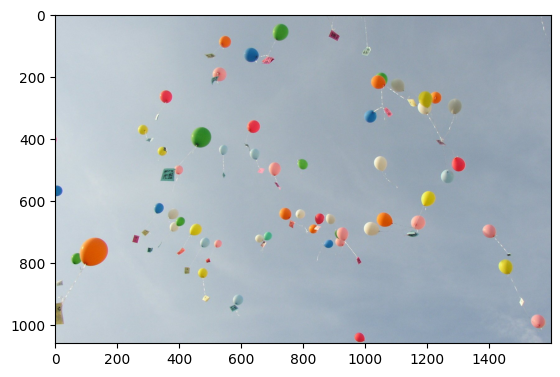

In [4]:
import matplotlib.pyplot as plt
import skimage as sk 
from skimage import io

from skimage.filters import threshold_otsu
from skimage.measure import label

# 1. read RGB image
I = sk.io.imread('/content/baloons.jpg')
plt.imshow(I)

2.Convert from RGB to grayscale

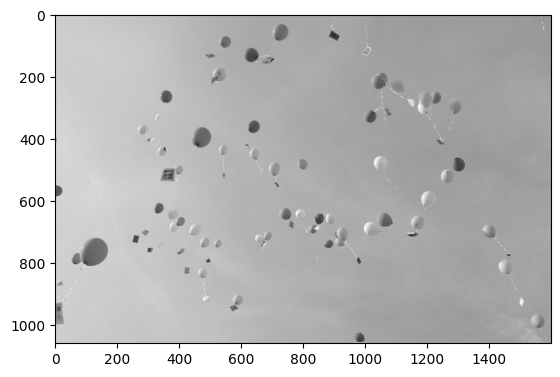

In [7]:
IG = sk.color.rgb2gray(I) # Convert RGB image to grayscale
plt.imshow(IG,cmap='gray')

3. Gamma correction with $\gamma=0.5$ 

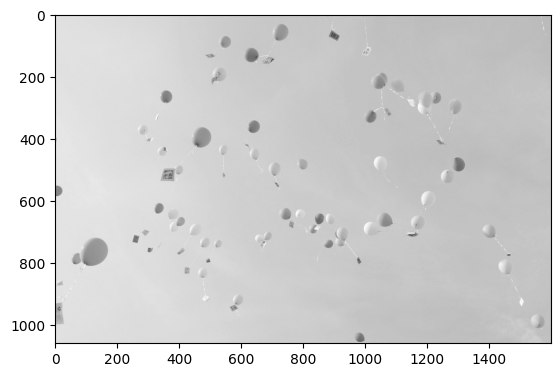

In [9]:
from skimage import exposure

IGC = exposure.adjust_gamma(IG, 0.5)
plt.imshow(IGC,cmap='gray')

4. Otsu threshold from grayscale (non gamma corrected)

In [10]:
# Apply Otsu threshold for segmentation :
thresh = threshold_otsu(IG)
print(thresh)

0.7134114108455883


5. Apply Otsu's threhold to gamma-corrected image

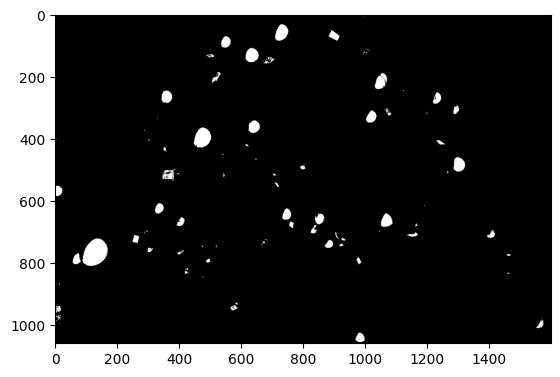

In [13]:
bw = IGC < thresh # keep lighter regions with grayscale intensities above threshold
plt.imshow(bw,cmap='gray')

6. label the objects

number of regions is 183


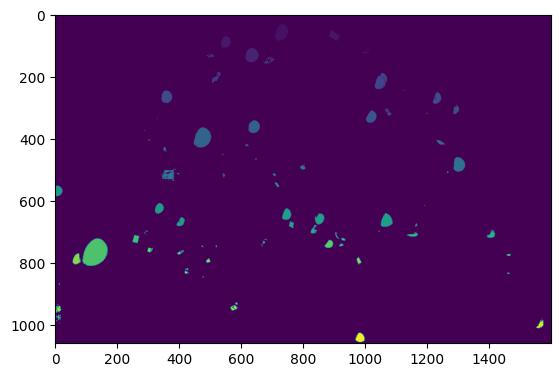

In [15]:
label_image, nregions = label(bw,return_num=True)

plt.imshow(label_image)
print('number of regions is {}'.format(nregions))

7. Extract regional properties (Area and eccentricity)

In [17]:
import pandas as pd
from skimage import measure

props = measure.regionprops_table(label_image,properties=['label','area','eccentricity'])

df_features = pd.DataFrame(props)
df_features.head()

,label,area,eccentricity
0,1,30,0.970992
1,2,39,0.983702
2,3,6,1.000000
3,4,10,1.000000
4,5,2,1.000000


<Axes: xlabel='area', ylabel='eccentricity'>

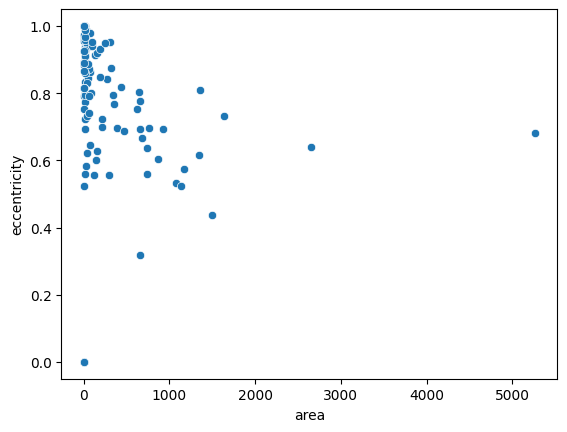

In [18]:
import seaborn as sns

sns.scatterplot(x='area',y='eccentricity',data=df_features)

8. Find balloons as objects with area higher than 500 and eccentricity lower than 0.8


In [21]:
df_balloons = df_features.loc[(df_features['area']>500) & (df_features['eccentricity']<0.8)]

df_balloons.head()
print('number of idenfitied balloons is {}'.format(df_balloons.shape[0]))

number of idenfitied balloons is 18


In [22]:
indx_balloons = df_balloons['label'].values

In [23]:
indx_balloons

array([  8,  11,  12,  18,  42,  49,  57,  58,  69,  81, 100, 101, 103,
       104, 105, 132, 152, 183])

In [24]:
import numpy as np
mask_balloons = np.isin(label_image,indx_balloons)

9. Plot the baloons

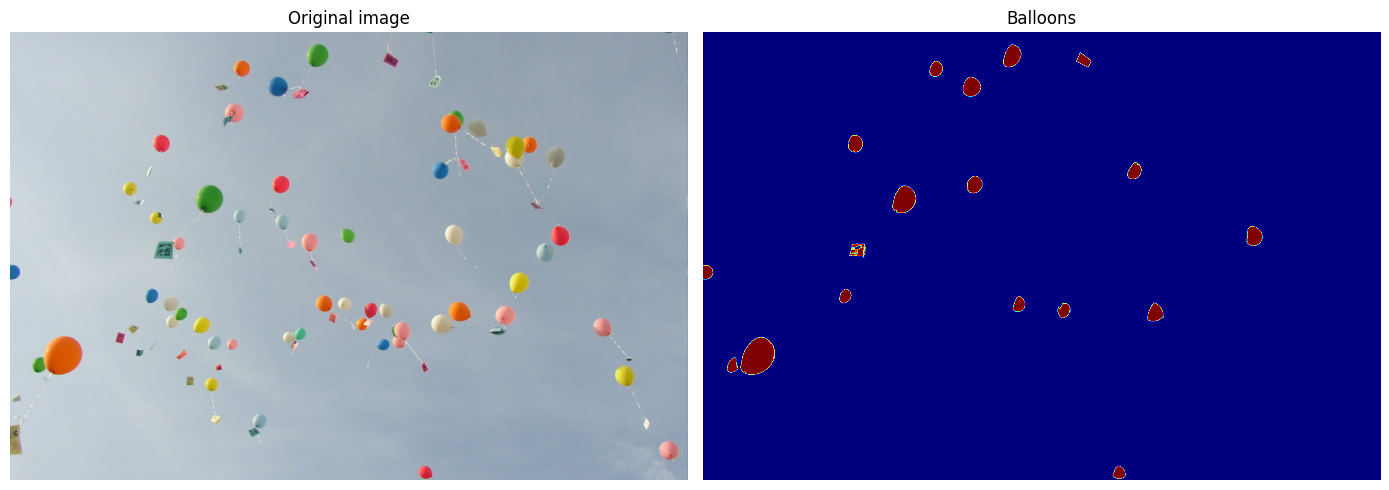

In [26]:
# Get some figures:
fig, axes = plt.subplots(1,2,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(I)
ax[0].set_title('Original image') 
ax[1].imshow(mask_balloons,cmap=plt.cm.jet)
ax[1].set_title('Balloons') # set figure title
ax[0].set_axis_off()
ax[1].set_axis_off()
plt.tight_layout()
plt.show()
     